# Bagging example Group 4: Use SciKit's BaggingRegressor


This Colab is based on work in

https://medium.com/@sumbatilinda/ensemble-learning-in-machine-learning-bagging-boosting-and-stacking-a00c6bae971f

Dataset (Salary_Data.csv):

https://www.kaggle.com/datasets/ravitejakotharu/salary-datacsv

Proposed method, use BaggingRegressor:

https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.BaggingRegressor.html

# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Loading data

In [ ]:
df = pd.read_csv("salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Define variables X and Y

In [ ]:
X = df[["YearsExperience"]] # Independent variable
y = df["Salary"] # Dependent variable

## Visualize the data

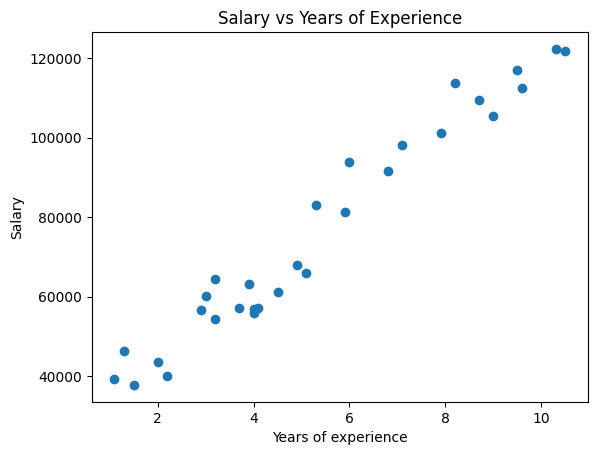

In [ ]:
plt.scatter(X,y) # Create scatter plot
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

## Data processing

In [ ]:
# Initialise the scalers
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(np.array(X).reshape(-1, 1))
y_scaled = y_scaler.fit_transform(np.array(y).reshape(-1, 1))


# Set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=6)

## Split into training data (80 %) and test data (20 %)

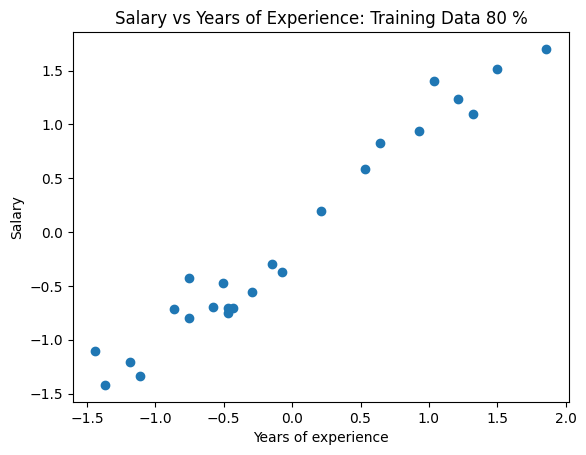

In [ ]:
plt.scatter(x_train,y_train) # Create scatter plot
plt.title("Salary vs Years of Experience: Training Data 80 %")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

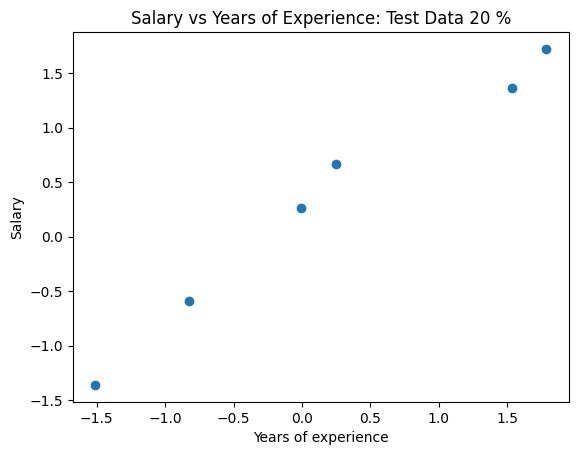

In [ ]:
plt.scatter(x_test,y_test) # Create scatter plot
plt.title("Salary vs Years of Experience: Test Data 20 %")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

# Choose a classifier: Liner regression

In [ ]:
# Instantiate linear regression model
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

LinearRegression()

RMSE:  0.267786079046986


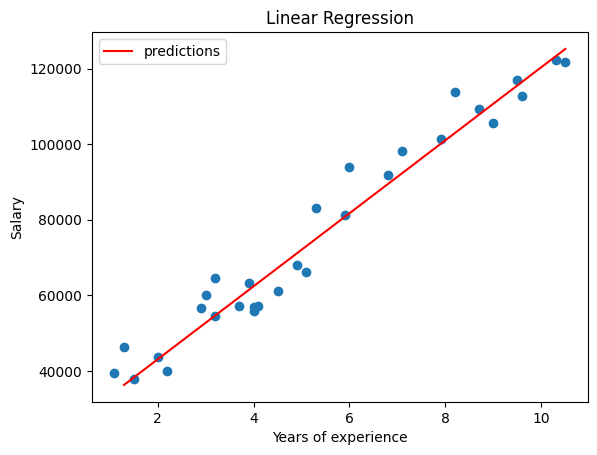

In [ ]:
y_pred = lin_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# Plot the linear regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(lin_reg.predict(x_domain))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Linear Regression")
plt.legend()
plt.show()

# What about Bagging? Here we use a different classifier: Decision tree

In [ ]:
# Importing the BaggingRegressor class from sklearn
from sklearn.ensemble import BaggingRegressor

In [ ]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=4)

# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(estimator = d_tree)

# Use a linear regression instead:
from sklearn.linear_model import LinearRegression
bag_reg = BaggingRegressor(estimator = LinearRegression())

# Arguments:

# more info about the method: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.BaggingRegressor.html


## Train the bagging ensemble

In [ ]:
bag_reg.fit(x_train,y_train[:,0])

BaggingRegressor(estimator=LinearRegression())

## Example of one ensemble performance:

RMSE:  0.26925543869877727


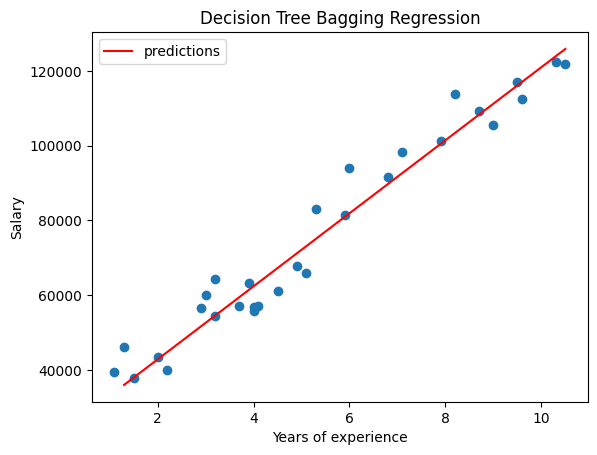

In [ ]:
y_pred = bag_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the bagging regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bag_reg.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Decision Tree Bagging Regression")

plt.legend()
plt.show()